In [72]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
pd.set_option('display.max.columns', 100)

# Adult Census Income
https://www.kaggle.com/uciml/adult-census-income

In [73]:
df = pd.read_csv('adult.csv')

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [75]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [76]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [77]:
df.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [78]:
df.shape

(32561, 15)

In [79]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

Переименуем колонки, в названиях которых есть "." для удобства обращения

In [80]:
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'ed_num',
       'marital_st', 'occupation', 'relationship', 'race', 'sex',
       'c_gain', 'c_loss', 'h_p_week', 'nat_country',
       'income']

In [81]:
df.head(5)

,age,workclass,fnlwgt,education,ed_num,marital_st,occupation,relationship,race,sex,c_gain,c_loss,h_p_week,nat_country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [82]:
df.describe(include=['object'])

,workclass,education,marital_st,occupation,relationship,race,sex,nat_country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


# Подготовка данных

In [83]:
df.isnull().head(10)

,age,workclass,fnlwgt,education,ed_num,marital_st,occupation,relationship,race,sex,c_gain,c_loss,h_p_week,nat_country,income
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [84]:
df.isnull().sum()

age             0
workclass       0
fnlwgt          0
education       0
ed_num          0
marital_st      0
occupation      0
relationship    0
race            0
sex             0
c_gain          0
c_loss          0
h_p_week        0
nat_country     0
income          0
dtype: int64

In [85]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [86]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [87]:
# Переимонвание "?" значений 
# df['workclass']=df['workclass'].replace('?','Unknown')

In [88]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [89]:
# Переимонвание "?" значений 
# df['occupation'] = df['occupation'].replace('?','Undefined')

In [90]:
df.c_gain.unique()

array([    0, 99999, 41310, 34095, 27828, 25236, 25124, 22040, 20051,
       18481, 15831, 15024, 15020, 14344, 14084, 13550, 11678, 10605,
       10566, 10520,  9562,  9386,  8614,  7978,  7896,  7688,  7443,
        7430,  7298,  6849,  6767,  6723,  6514,  6497,  6418,  6360,
        6097,  5721,  5556,  5455,  5178,  5060,  5013,  4934,  4931,
        4865,  4787,  4687,  4650,  4508,  4416,  4386,  4101,  4064,
        3942,  3908,  3887,  3818,  3781,  3674,  3471,  3464,  3456,
        3432,  3418,  3411,  3325,  3273,  3137,  3103,  2993,  2977,
        2964,  2961,  2936,  2907,  2885,  2829,  2653,  2635,  2597,
        2580,  2538,  2463,  2414,  2407,  2387,  2354,  2346,  2329,
        2290,  2228,  2202,  2176,  2174,  2105,  2062,  2050,  2036,
        2009,  1848,  1831,  1797,  1639,  1506,  1471,  1455,  1424,
        1409,  1173,  1151,  1111,  1086,  1055,   991,   914,   594,
         401,   114])

In [91]:
df.c_loss.unique()

array([4356, 3900, 3770, 3683, 3004, 2824, 2754, 2603, 2559, 2547, 2489,
       2472, 2467, 2457, 2444, 2415, 2392, 2377, 2352, 2339, 2282, 2267,
       2258, 2246, 2238, 2231, 2206, 2205, 2201, 2179, 2174, 2163, 2149,
       2129, 2080, 2057, 2051, 2042, 2002, 2001, 1980, 1977, 1974, 1944,
       1902, 1887, 1876, 1848, 1844, 1825, 1816, 1762, 1755, 1741, 1740,
       1735, 1726, 1721, 1719, 1672, 1669, 1668, 1651, 1648, 1628, 1617,
       1602, 1594, 1590, 1579, 1573, 1564, 1539, 1504, 1485, 1411, 1408,
       1380, 1340, 1258, 1138, 1092,  974,  880,  810,  653,  625,  419,
        323,  213,  155,    0])

In [125]:
# Заменить 0 значения на среднее
df['c_gain'] = df['c_gain'].replace(0,df['c_gain'].mean())
df['c_loss'] = df['c_loss'].replace(0,df['c_loss'].mean())

In [126]:
df.describe()

,age,fnlwgt,ed_num,c_gain,c_loss,h_p_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,2065.540504,170.534857,40.437456
std,13.640433,1.055500e+05,2.572720,7245.822677,384.945075,12.347429
min,17.000000,1.228500e+04,1.000000,114.000000,87.303830,1.000000
25%,28.000000,1.178270e+05,9.000000,1077.648844,87.303830,40.000000
50%,37.000000,1.783560e+05,10.000000,1077.648844,87.303830,40.000000
75%,48.000000,2.370510e+05,12.000000,1077.648844,87.303830,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [94]:
df.nat_country.unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

In [95]:
# Переимонвание "?" значений 
# df['native_country'] = df['native_country'].replace('?','Country')

# Описательная статистика

Диаграмма корреляции

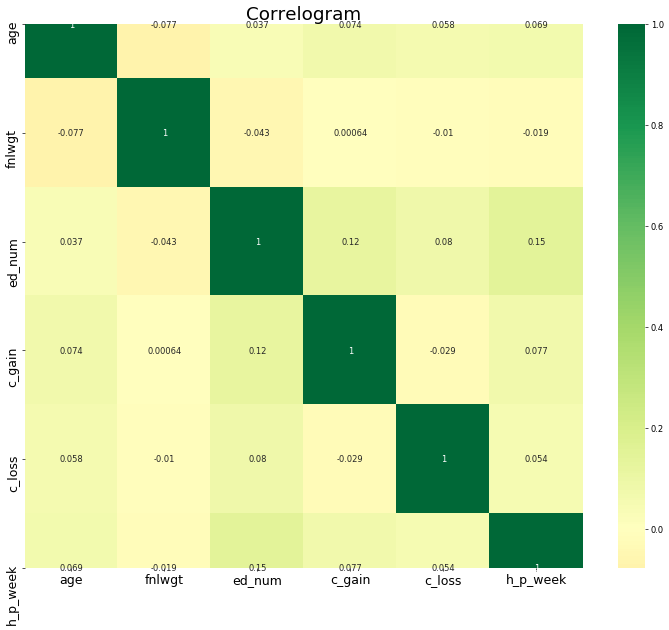

In [138]:
# Plot
plt.figure(figsize=(15,12), dpi= 60)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

## Гипотеза 1. Самая популярная профессия у мужчин - craft-repair, у женщин - sales
Какие профессии самые популярные у мужчин и женщин?

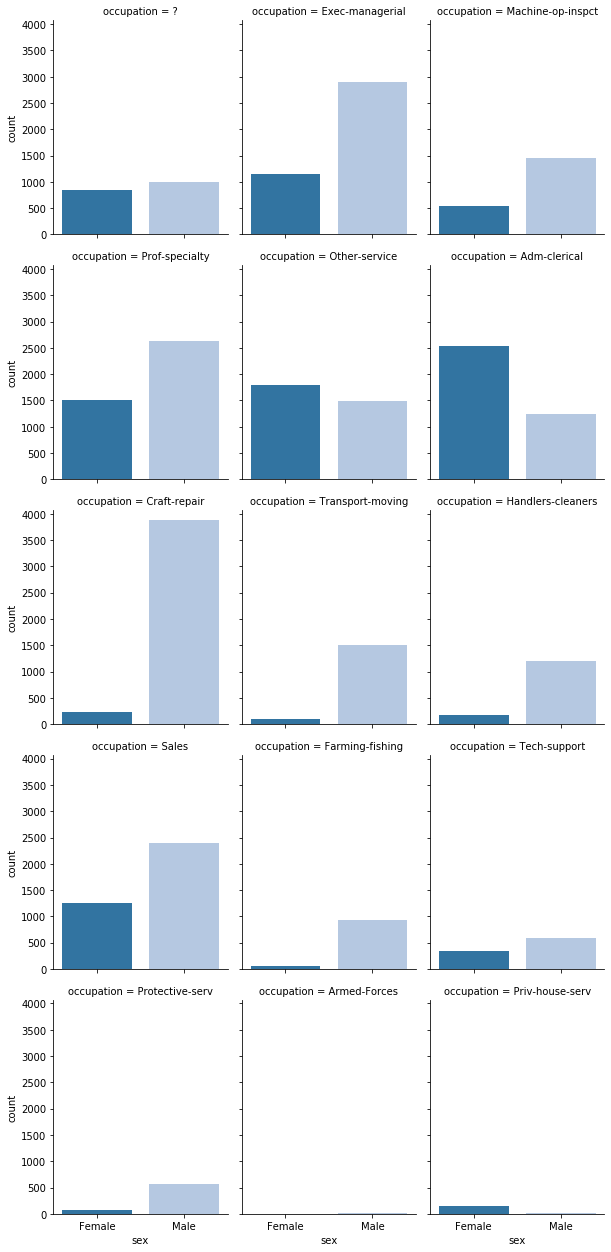

In [97]:
# Plot
g = sns.catplot("sex", col="occupation", col_wrap=3,
                data=df[df.occupation.notnull()],
                kind="count", height=3.5, aspect=.8, 
                palette='tab20')


plt.show()

Профессия у мужчин - craft-repair, у женщин - adm-clerical

## Гипотеза 2 возраст

Люди какой возрастной категории преобладают в каждой профессии

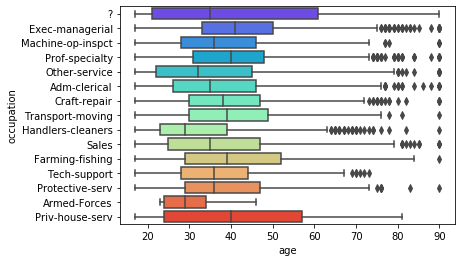

In [98]:
sns.boxplot(x="age", y="occupation", data=df, palette='rainbow')

Каков средний и максимальный возраст?

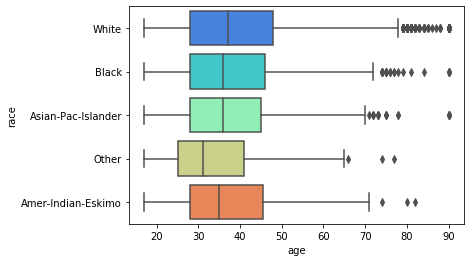

In [99]:
sns.boxplot(x="age", y="race", data=df, palette='rainbow')

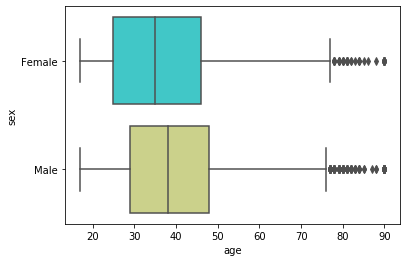

In [100]:
sns.boxplot(x="age", y="sex", data=df, palette='rainbow')

## Гипотеза 3 Уровень з.п.

Уровень заработной платы

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cb4ab10>,
      dtype=object)

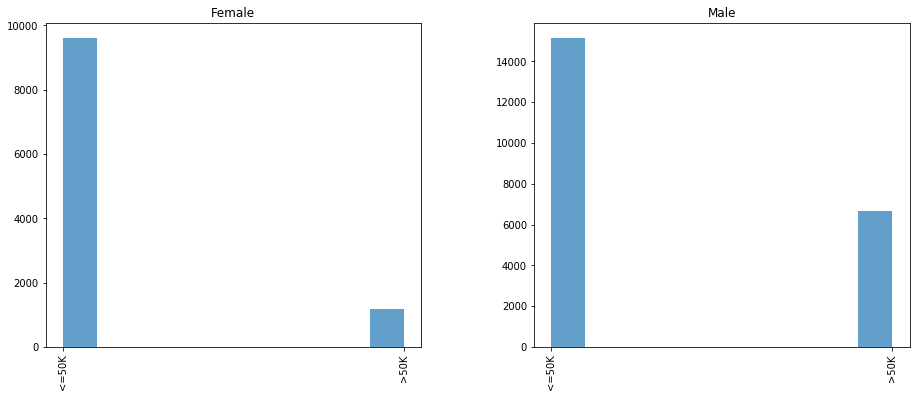

In [134]:
df.hist('income', by='sex', figsize = [15,6], alpha=0.7)

Зависимость дохода от расы

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a207eff90>,
      dtype=object)

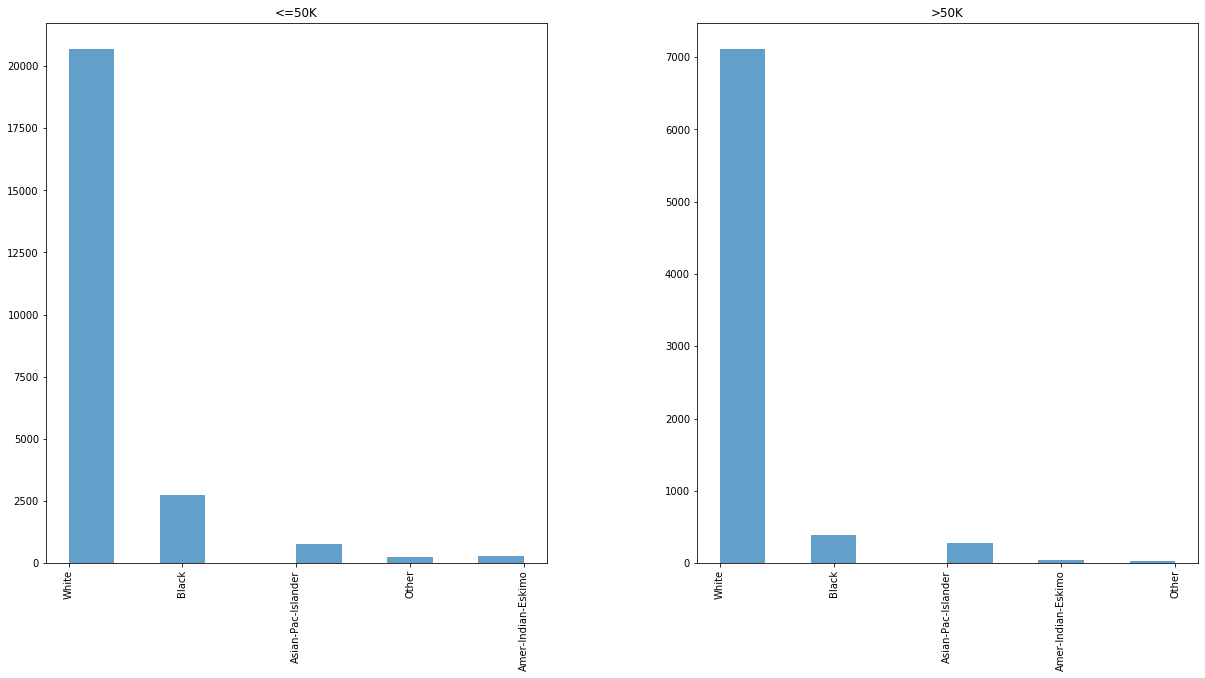

In [136]:
df.hist('race', by='income', figsize = [20,10], alpha=0.7)

Зависимость дохода от статуса (один/женат/замужен/в разводе...)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a20bab9d0>,
      dtype=object)

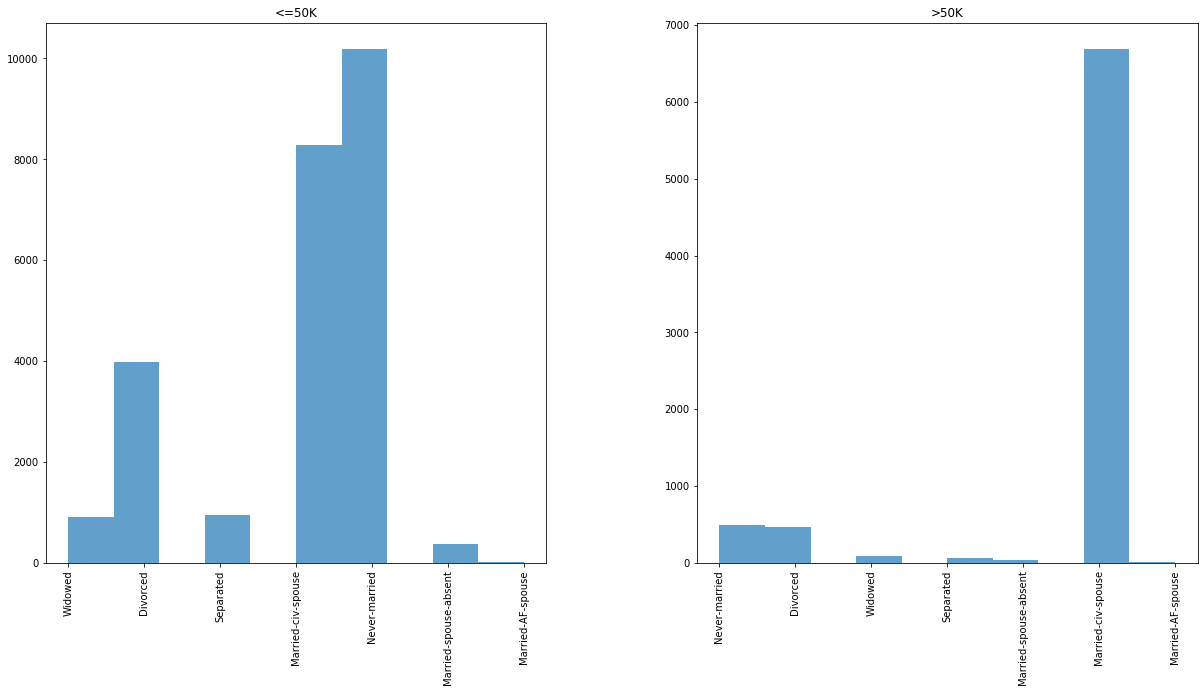

In [135]:
df.hist('marital_st', by='income', figsize = [20,10], alpha=0.7)

Зависимость дохода от уровня образования

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a23e26b90>,
      dtype=object)

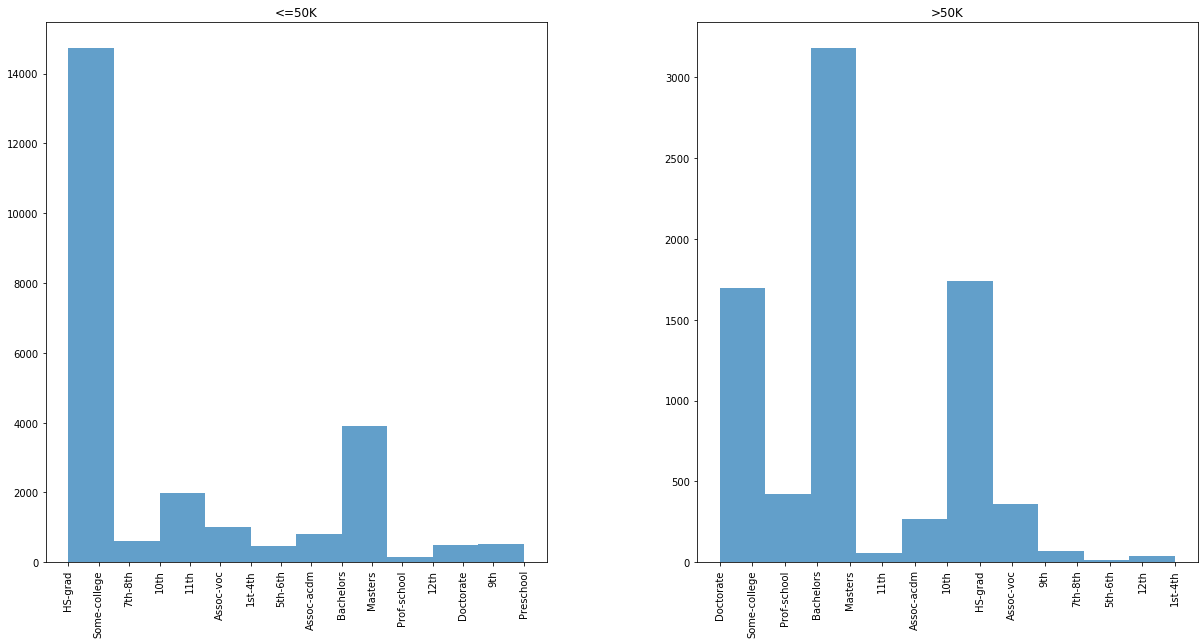

In [102]:
df.hist('education', by='income', figsize = [20,10], alpha=0.7)

Кто больше зарабатывает?

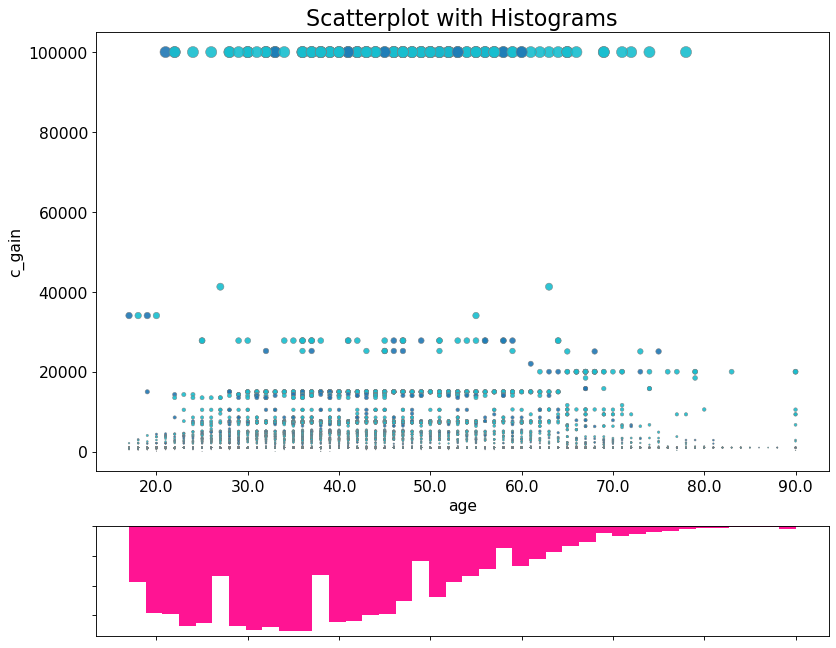

In [127]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
# ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('age', 'c_gain', s=df.c_gain*0.001, c=df.sex.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.age, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
# ax_right.hist(df.c_loss, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms', xlabel='age', ylabel='c_gain')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()

Кто больше тратит?

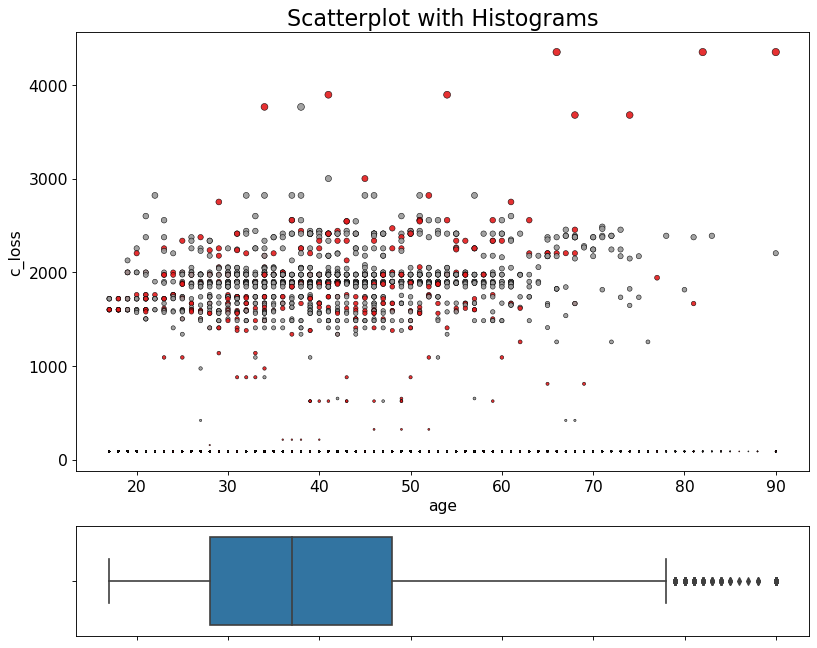

In [133]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
# ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('age', 'c_loss', s=df.c_loss*0.01, c=df.sex.astype('category').cat.codes, alpha=.9, data=df, cmap="Set1", edgecolors='black', linewidths=.5)

# Add a graph in each part
sns.boxplot(df.c_loss, ax=ax_right, orient="v")
sns.boxplot(df.age, ax=ax_bottom, orient="h")

# Decorations ------------------
# Remove x axis name for the boxplot
ax_bottom.set(xlabel='')
ax_right.set(ylabel='')

# Main Title, Xlabel and YLabel
ax_main.set(title='Scatterplot with Histograms', xlabel='age', ylabel='c_loss')

# Set font size of different components
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

plt.show()

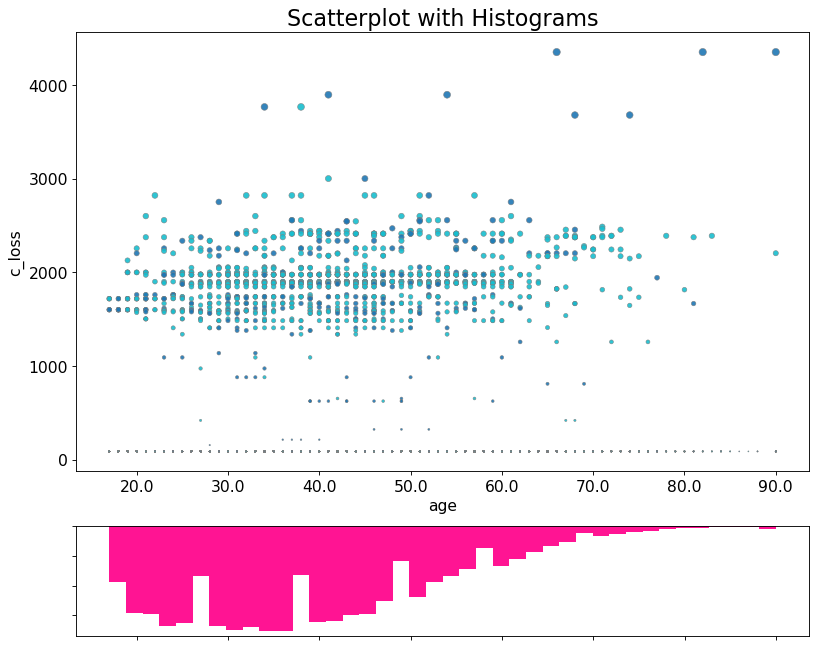

In [137]:
# Create Fig and gridspec
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# Define the axes
ax_main = fig.add_subplot(grid[:-1, :-1])
# ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# Scatterplot on main ax
ax_main.scatter('age', 'c_loss', s=df.c_loss*0.01, c=df.sex.astype('category').cat.codes, alpha=.9, data=df, cmap="tab10", edgecolors='gray', linewidths=.5)

# histogram on the right
ax_bottom.hist(df.age, 40, histtype='stepfilled', orientation='vertical', color='deeppink')
ax_bottom.invert_yaxis()

# histogram in the bottom
# ax_right.hist(df.c_loss, 40, histtype='stepfilled', orientation='horizontal', color='deeppink')

# Decorations
ax_main.set(title='Scatterplot with Histograms', xlabel='age', ylabel='c_loss')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

xlabels = ax_main.get_xticks().tolist()
ax_main.set_xticklabels(xlabels)
plt.show()